### Practice activity: Implementing k-means clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Create a sample dataset with customer annual income and spending score
data = {'AnnualIncome': [
        15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35,   # Normal points
        80, 85, 90  # Outliers
    ],
    'SpendingScore': [
        39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96,
        6, 9, 12, 15, 18, 21, 24, 27, 30, 33,
        5, 8, 11, 14, 17, 20, 23, 26, 29, 32,
        56,   # Normal points
        2, 3, 100  # Outliers
    ]}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head(10))

   AnnualIncome  SpendingScore
0          15.0             39
1          15.5             42
2          16.0             45
3          16.5             48
4          17.0             51
5          17.5             54
6          18.0             57
7          18.5             60
8          19.0             63
9          19.5             66


In [4]:
# Normalize the dataset using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore'])
print(df_scaled.head(10))

   AnnualIncome  SpendingScore
0     -0.869761      -0.135877
1     -0.838899      -0.033387
2     -0.808036       0.069103
3     -0.777174       0.171594
4     -0.746311       0.274084
5     -0.715449       0.376574
6     -0.684586       0.479065
7     -0.653724       0.581555
8     -0.622861       0.684045
9     -0.591999       0.786535


In [22]:
# Initialize the KMeans algorithm with k clusters
k = 3  # You can start with 3 clusters
kmeans = KMeans(n_clusters=k)

# Fit the model and assign cluster labels
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

# Display the first few rows with cluster assignments
print(df.head(10))

   AnnualIncome  SpendingScore  Cluster
0          15.0             39        0
1          15.5             42        0
2          16.0             45        0
3          16.5             48        0
4          17.0             51        0
5          17.5             54        0
6          18.0             57        0
7          18.5             60        0
8          19.0             63        0
9          19.5             66        0


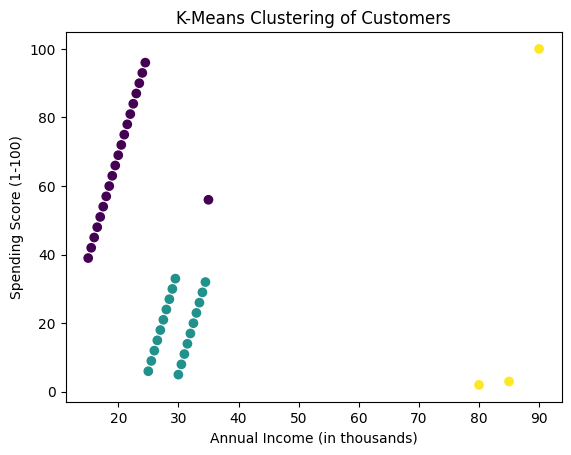

In [23]:
# Plot the clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

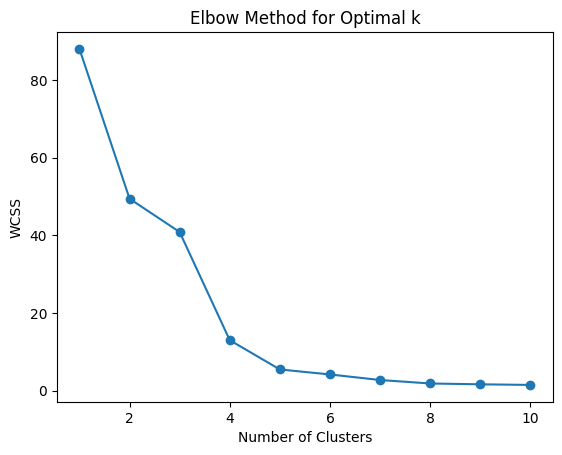

In [21]:
# Calculate the WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to visualize the Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Practice activity: Implementing DBSCAN clustering

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [68]:
data = {'AnnualIncome': [
        15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35,   # Normal points
        80, 85, 90  # Outliers
    ],
    'SpendingScore': [
        39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96,
        6, 9, 12, 15, 18, 21, 24, 27, 30, 33,
        5, 8, 11, 14, 17, 20, 23, 26, 29, 32,
        56,   # Normal points
        2, 3, 100  # Outliers
    ]}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head(10))

   AnnualIncome  SpendingScore
0          15.0             39
1          15.5             42
2          16.0             45
3          16.5             48
4          17.0             51
5          17.5             54
6          18.0             57
7          18.5             60
8          19.0             63
9          19.5             66


In [69]:
# Normalize the dataset using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore'])
print(df_scaled.head(10))

   AnnualIncome  SpendingScore
0     -0.869761      -0.135877
1     -0.838899      -0.033387
2     -0.808036       0.069103
3     -0.777174       0.171594
4     -0.746311       0.274084
5     -0.715449       0.376574
6     -0.684586       0.479065
7     -0.653724       0.581555
8     -0.622861       0.684045
9     -0.591999       0.786535


In [70]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN with the parameters
dbscan = DBSCAN(eps=0.5, min_samples=3)

# Fit the model to the scaled data
dbscan.fit(df_scaled)

# Assign cluster labels to the data points
df['Cluster'] = dbscan.labels_

# Display the first few rows with cluster labels
print(df.tail(10))

    AnnualIncome  SpendingScore  Cluster
34          32.0             17        1
35          32.5             20        1
36          33.0             23        1
37          33.5             26        1
38          34.0             29        1
39          34.5             32        1
40          35.0             56       -1
41          80.0              2       -1
42          85.0              3       -1
43          90.0            100       -1


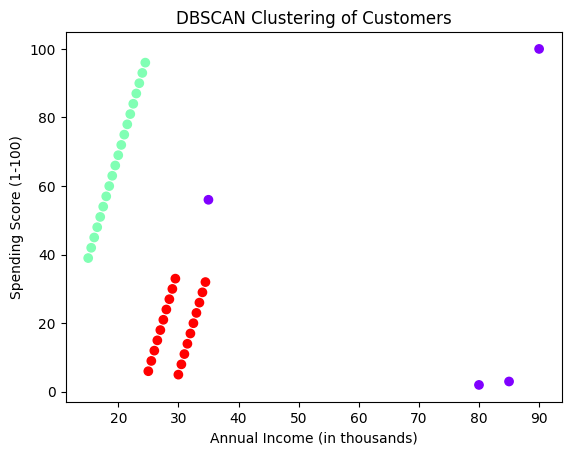

In [71]:
# Plot the clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

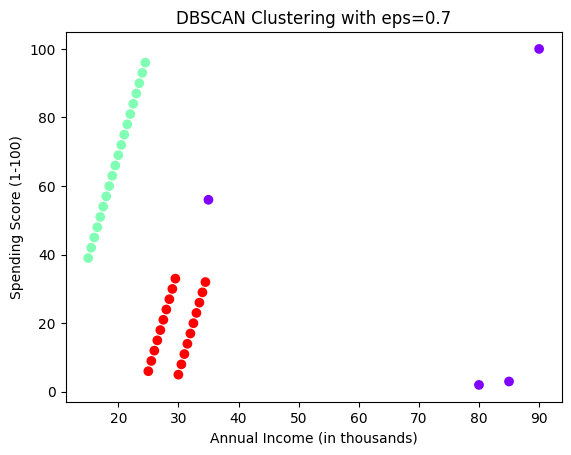

In [76]:
# Increase eps to 0.7 and refit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(df_scaled)
df['Cluster'] = dbscan.labels_

# Plot the updated clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering with eps=0.7')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

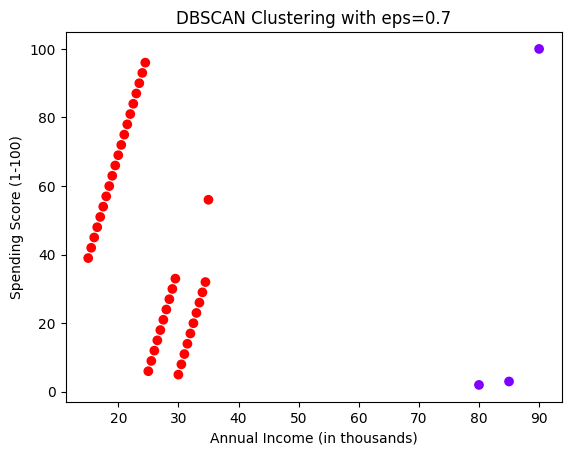

In [81]:
# Increase eps to 0.7 and refit DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=3)
dbscan.fit(df_scaled)
df['Cluster'] = dbscan.labels_

# Plot the updated clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering with eps=0.7')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Practice activity: Implementing clustering and visualization

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

In [83]:
data = {'AnnualIncome': [
        15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35,   # Normal points
        80, 85, 90  # Outliers
    ],
    'SpendingScore': [
        39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96,
        6, 9, 12, 15, 18, 21, 24, 27, 30, 33,
        5, 8, 11, 14, 17, 20, 23, 26, 29, 32,
        56,   # Normal points
        2, 3, 100  # Outliers
    ]}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore
0          15.0             39
1          15.5             42
2          16.0             45
3          16.5             48
4          17.0             51


In [84]:
# Normalize the dataset using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore'])
print(df_scaled.head())

   AnnualIncome  SpendingScore
0     -0.869761      -0.135877
1     -0.838899      -0.033387
2     -0.808036       0.069103
3     -0.777174       0.171594
4     -0.746311       0.274084


In [93]:
# Initialize and fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Add cluster labels to the original dataframe
df['KMeans_Cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
print(df.head())

   AnnualIncome  SpendingScore  KMeans_Cluster  DBSCAN_Cluster
0          15.0             39               2               0
1          15.5             42               2               0
2          16.0             45               2               0
3          16.5             48               2               0
4          17.0             51               2               0


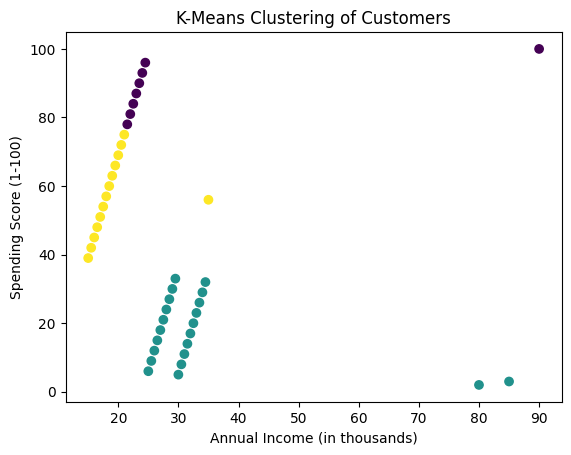

In [94]:
# Plot K-Means clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [91]:
# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(df_scaled)

# Add DBSCAN cluster labels to the original dataframe
df['DBSCAN_Cluster'] = dbscan.labels_

# Display the first few rows with cluster labels
print(df.head())

   AnnualIncome  SpendingScore  KMeans_Cluster  DBSCAN_Cluster
0          15.0             39               2               0
1          15.5             42               2               0
2          16.0             45               2               0
3          16.5             48               2               0
4          17.0             51               2               0


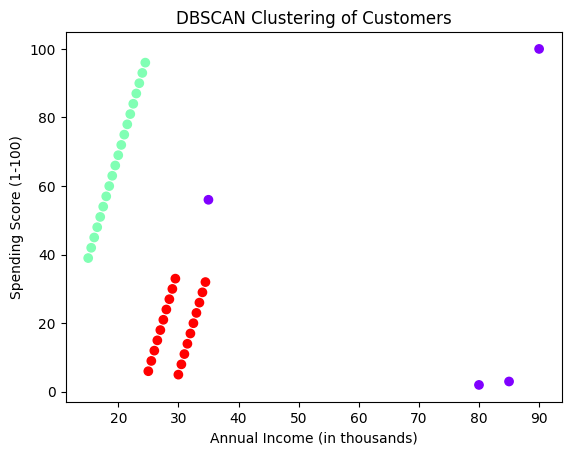

In [92]:
# Plot DBSCAN clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['DBSCAN_Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Practice activity: Implementing dimensionality reduction techniques

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [96]:
# Create a sample dataset with customer annual income, spending score, and age
data = {
    'AnnualIncome': [
        15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35,   # Normal points
        80, 85, 90  # Outliers
    ],
    'SpendingScore': [
        39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96,
        6, 9, 12, 15, 18, 21, 24, 27, 30, 33,
        5, 8, 11, 14, 17, 20, 23, 26, 29, 32,
        56,   # Normal points
        2, 3, 100  # Outliers
    ],
    'Age': [
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35, 35.5, 36, 36.5, 37, 37.5, 38, 38.5, 39, 39.5, 
        40,   # Normal points
        15, 60, 70  # Outliers
    ]
}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore   Age
0          15.0             39  20.0
1          15.5             42  20.5
2          16.0             45  21.0
3          16.5             48  21.5
4          17.0             51  22.0


In [109]:
# Normalize the data
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

# Convert back to DataFrame for easy handling
df_scaled = pd.DataFrame(scaled, columns=df.columns)#=['AnnualIncome', 'SpendingScore','Age'])

print(df_scaled.head())

   AnnualIncome  SpendingScore       Age
0     -0.869761      -0.135877 -1.166678
1     -0.838899      -0.033387 -1.114825
2     -0.808036       0.069103 -1.062973
3     -0.777174       0.171594 -1.011121
4     -0.746311       0.274084 -0.959268


In [110]:
# Apply PCA to reduce dimensions from 3 to 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled)

# Convert back to DataFrame for easy handling
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
print(df_pca.head())

       PCA1      PCA2
0 -1.324642 -0.590673
1 -1.300977 -0.474300
2 -1.277312 -0.357927
3 -1.253647 -0.241554
4 -1.229982 -0.125181


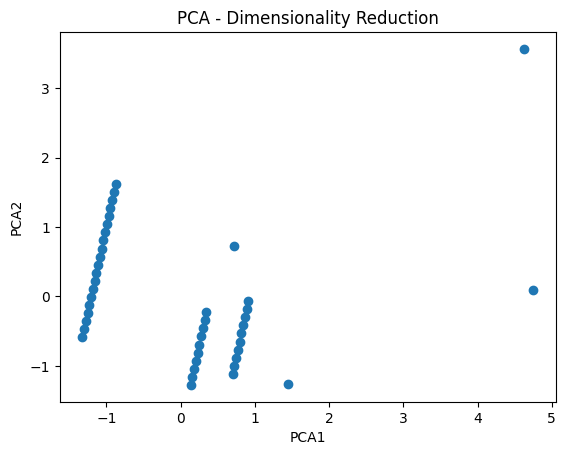

In [111]:
# Plot the PCA components
plt.scatter(df_pca['PCA1'], df_pca['PCA2'])
plt.title('PCA - Dimensionality Reduction')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

      t-SNE1      t-SNE2
0  -8.626333  132.455704
1  -6.954533  122.494347
2 -16.487232  117.027298
3 -24.738333  108.902702
4 -33.278656  100.154373


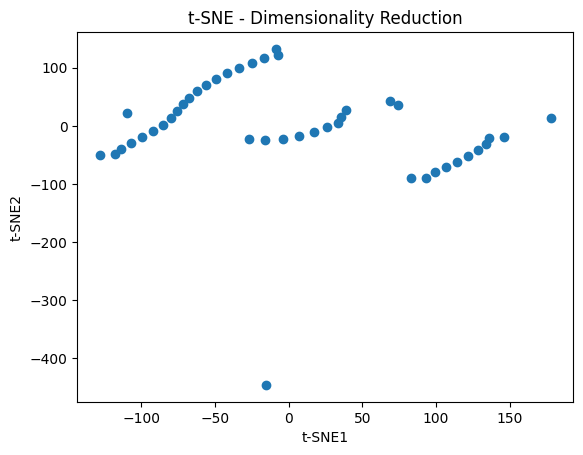

In [164]:
# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
df_tsne = tsne.fit_transform(scaled)

# Convert the t-SNE result back to a DataFrame
df_tsne = pd.DataFrame(df_tsne, columns=['t-SNE1', 't-SNE2'])
print(df_tsne.head())

# Plot the t-SNE components
plt.scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'])
plt.title('t-SNE - Dimensionality Reduction')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [180]:
# Create a sample dataset with customer annual income, spending score, and age
data = {
    'AnnualIncome': [
        15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35,   # Normal points
        80, 85, 90  # Outliers
    ],
    'SpendingScore': [
        39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96,
        6, 9, 12, 15, 18, 21, 24, 27, 30, 33,
        5, 8, 11, 14, 17, 20, 23, 26, 29, 32,
        56,   # Normal points
        2, 3, 100  # Outliers
    ],
    'Age': [
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35, 35.5, 36, 36.5, 37, 37.5, 38, 38.5, 39, 39.5, 
        40,   # Normal points
        15, 60, 70  # Outliers
    ]
}

data = {'AnnualIncome': [15, 16, 17, 18, 19, 20, 22, 25, 30, 35],
        'SpendingScore': [39, 81, 6, 77, 40, 76, 94, 5, 82, 56],
        'Age': [20, 22, 25, 24, 35, 40, 30, 21, 50, 31]}


df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore  Age
0            15             39   20
1            16             81   22
2            17              6   25
3            18             77   24
4            19             40   35


In [181]:
from sklearn.preprocessing import StandardScaler

# Normalize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore', 'Age'])
print(df_scaled.head())

   AnnualIncome  SpendingScore       Age
0     -1.086741      -0.546384 -1.074654
1     -0.924540       0.836033 -0.855337
2     -0.762340      -1.632569 -0.526361
3     -0.600140       0.704374 -0.636020
4     -0.437940      -0.513469  0.570225


In [182]:
from sklearn.cluster import KMeans

# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Display the cluster assignments
print(df_scaled.head())

   AnnualIncome  SpendingScore       Age  KMeans_Cluster
0     -1.086741      -0.546384 -1.074654               2
1     -0.924540       0.836033 -0.855337               0
2     -0.762340      -1.632569 -0.526361               2
3     -0.600140       0.704374 -0.636020               0
4     -0.437940      -0.513469  0.570225               2


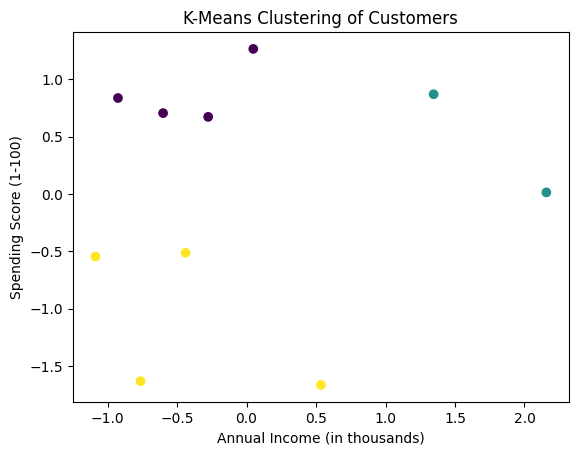

In [183]:
# Visualize the K-Means clusters
plt.scatter(df_scaled['AnnualIncome'], df_scaled['SpendingScore'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [184]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert the PCA result back to a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
print(df_pca.head())

       PCA1      PCA2
0 -1.727176 -0.576167
1  0.282610 -1.762704
2 -2.032233  0.275256
3  0.414749 -1.395518
4 -0.658721  0.581370


In [203]:
from sklearn.manifold import TSNE

# Set perplexity to a value smaller than the number of samples
tsne = TSNE(n_components=2, perplexity=6)

df_tsne = tsne.fit_transform(df_scaled)

# Convert the t-SNE result back to a DataFrame
df_tsne = pd.DataFrame(df_tsne, columns=['t-SNE1', 't-SNE2'])
print(df_tsne.head())

      t-SNE1     t-SNE2
0 -24.804790  45.415585
1  -5.913276  17.166975
2 -37.755680  45.356686
3 -14.939311  25.668852
4 -32.578342  35.135082


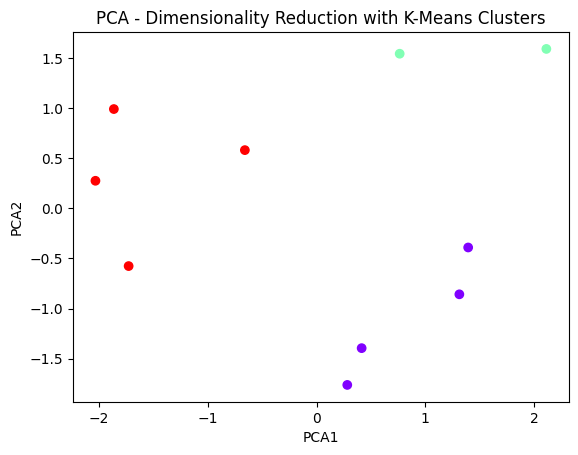

In [189]:
# Visualize the PCA components
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_scaled['KMeans_Cluster'], cmap='rainbow')
plt.title('PCA - Dimensionality Reduction with K-Means Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

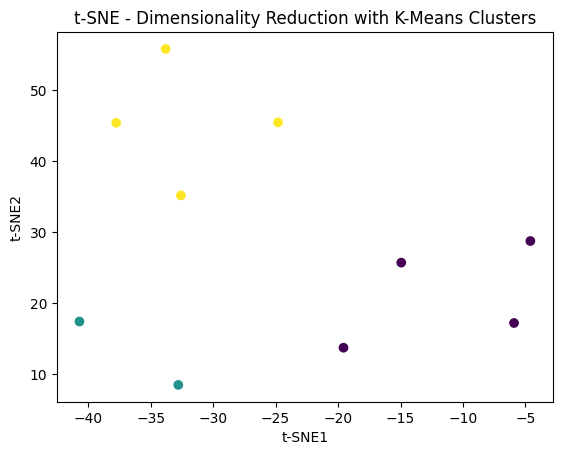

In [204]:
# Visualize the t-SNE components
plt.scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('t-SNE - Dimensionality Reduction with K-Means Clusters')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()